+ https://www.youtube.com/watch?v=NmLK_WQBxB4&t=1963s
+ https://poloclub.github.io/cnn-explainer/
+ https://iq.opengenus.org/different-types-of-cnn-models/

+ Nhược điểm của mô hình FFNN (Feed-forward Neural Network) trong bài toán phân loại ảnh:
    - Chi phí về mặt tính toán rất lớn
    - Không xét đến khía cạnh không gian: điểm ảnh xa, gần coi như nhau
    - Nhạy cảm với vị trí của các đối tượng trong ảnh
+ CNN (Convolutional Neural Network)
    - Convolutional layer
    - ReLu activation function: $\texttt{ReLu}(x) = \texttt{max}(0, x)$
    - Pooling layer
    - Fully-connected layer (Dense layer trong Keras)

In [1]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# convolutional layer
# https://setosa.io/ev/image-kernels/

# mot anh dau vao: 3 ma tran 28x28: 28x28x3 (width x height x colors)
# mot bo loc: 3 ma tran 3x3: 3x3x3 -> dung 8 filters: 3x3x3x8
# nhan chap mot filter 3x3x3 voi anh 28x28x3 -> feature map: 26x26
# su dung 8 filters: -> 8 feature maps: 26x26x8
# lam tren 4 anh dau vao: -> 4x26x26x8
inp = tf.random.normal((4, 28, 28, 3)) # ''(batch_size, width, height, nb_channels)
conv2d = keras.layers.Conv2D(filters=8, kernel_size=3, activation="relu", input_shape=(28, 28, 3)) # filter shape: (3, 3, 3, 8)
out = conv2d(inp) # (4, 26, 26, 8)
print(out.shape)

In [ ]:
conv2d = keras.layers.Conv2D(filters=8, kernel_size=3, activation="relu", input_shape=(28, 28, 3), padding="same")
conv2d(inp).shape

In [ ]:
conv2d = keras.layers.Conv2D(filters=8, kernel_size=3, activation="relu", input_shape=(28, 28, 3), padding="same", strides=(2, 2))
conv2d(inp).shape

In [ ]:
# pooling layer
# + giam so chieu cua du lieu -> giam chi phi ve mat tinh toan
# + tranh duoc phan nao hien tuong overfitting
# + max pooling, avg pooling
print(inp.shape)
pool2d = keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))
print(pool2d(inp).shape)

### Image Classification (CIFAR-10)

CIFAR-10: 60K color images in 10 classes (airplane, automobile, bird, cat, ..) 

In [2]:
from tensorflow import keras

(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

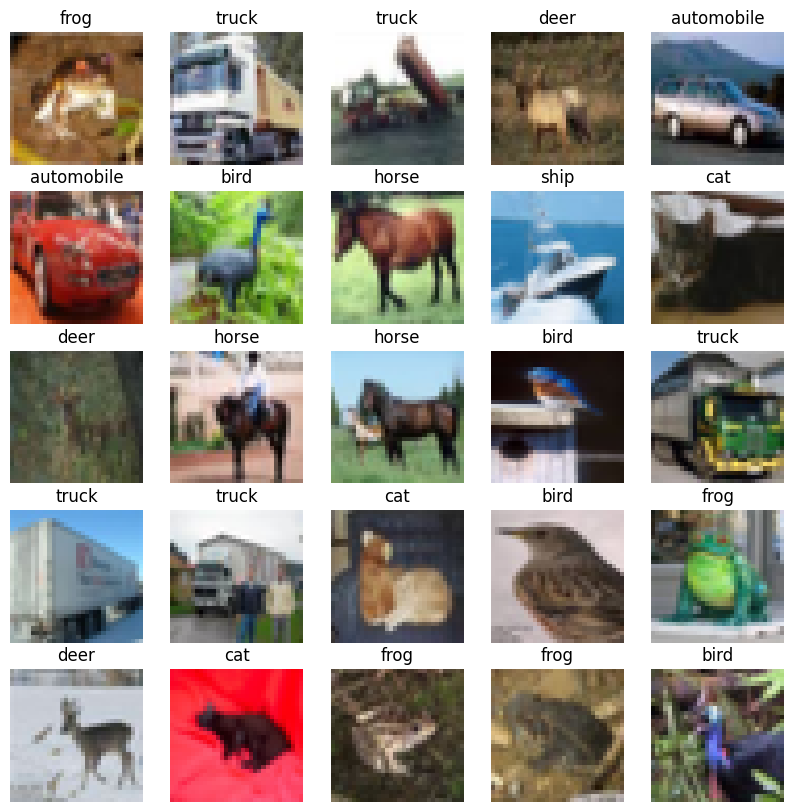

In [3]:
import matplotlib.pyplot as plt

class_names = "airplane automobile bird cat deer dog frog horse ship truck".split()

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i].astype("uint8"))
    # fix --------
#     plt.title(class_names[train_labels[i]])
    plt.title(class_names[train_labels[i, 0]]) # train_labels shape: (50000, 1)

    plt.axis("off")

In [ ]:
train_images, test_images = train_images / 255., test_images / 255.
train_images[0]

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10)
])

model.summary()

In [ ]:
model.compile(optimizer="adam",
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])
hist = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=32)

### In-Class Practice

Dataset: intel-image-classification

-> Cach load dataset tu cac folder

In [ ]:
from tensorflow import keras

train_folder = "../input/intel-image-classification/seg_train/seg_train"
test_folder = "../input/intel-image-classification/seg_test/seg_test"
train_ds = keras.utils.image_dataset_from_directory(directory=train_folder,
                                                    labels="inferred",
                                                    label_mode="int",
                                                    color_mode="rgb",
                                                    batch_size=32,
                                                    image_size=(150, 150),
                                                    validation_split=0.25,
                                                    subset="training",
                                                    seed=123)
val_ds = keras.utils.image_dataset_from_directory(directory=train_folder,
                                                  labels="inferred",
                                                  label_mode="int",
                                                  color_mode="rgb",
                                                  batch_size=32,
                                                  image_size=(150, 150),
                                                  validation_split=0.25,
                                                  subset="validation",
                                                  seed=123)
test_ds = keras.utils.image_dataset_from_directory(directory=test_folder,
                                                   color_mode="rgb",
                                                   batch_size=32,
                                                   image_size=(150, 150))

In [ ]:
class_names = train_ds.class_names
class_names

In [ ]:
# doc mot batch
images, labels = next(iter(train_ds))
images.shape, labels.shape

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
model = keras.Sequential([
    keras.layers.Rescaling(1./255, input_shape=(150, 150, 3)),
    keras.layers.Conv2D(32, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(6, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

In [ ]:
check_point = keras.callbacks.ModelCheckpoint("/checkpoint", monitor="val_accuracy", mode="max", save_best_only=True, save_weights_only=True)
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)
hist = model.fit(train_ds, validation_data=val_ds, epochs=20, callbacks=[check_point, early_stopping])

In [ ]:
model.evaluate(val_ds)

In [ ]:
model.evaluate(test_ds)

In [ ]:
model.load_weights("/checkpoint")
model.evaluate(val_ds)

In [ ]:
model.evaluate(test_ds)

In [ ]:
model = keras.Sequential([
    keras.layers.Rescaling(1./255, input_shape=(150, 150, 3)),
    keras.layers.Conv2D(32, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(128, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(256, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dense(6, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

In [ ]:
check_point = keras.callbacks.ModelCheckpoint("/checkpoint", monitor="val_accuracy", mode="max", save_best_only=True, save_weights_only=True)
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)
hist = model.fit(train_ds, validation_data=val_ds, epochs=20, callbacks=[check_point, early_stopping])

In [ ]:
model.load_weights("/checkpoint")
model.evaluate(test_ds)

In [ ]:
fig = plt.figure(figsize=(10, 10))

# plot acc
plt.subplot(221)
plt.plot(hist.history['accuracy'],'bo--', label = "train accuracy")
plt.plot(hist.history['val_accuracy'], 'ro--', label = "validation accuracy")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

# plot loss function
plt.subplot(222)
plt.plot(hist.history['loss'],'bo--', label = "train loss")
plt.plot(hist.history['val_loss'], 'ro--', label = "validation loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")

plt.legend()
plt.show()